In [3]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
df_raw = pd.read_csv('data/bank.csv')
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

df_raw_dummy = pd.get_dummies(df_raw)

df_train, df_test = train_test_split(df_raw_dummy, test_size= 0.2, random_state=1234)
print('학습용 데이터의 크기: {}'.format(df_train.shape))
print('평가용 데이터의 크기: {}'.format(df_test.shape))

df_train_y = df_train['BAD']
df_train_x = df_train.drop(columns = 'BAD', inplace = False)
df_test_y = df_test['BAD']
df_test_x = df_test.drop(columns = 'BAD', inplace = False)

학습용 데이터의 크기: (2998, 19)
평가용 데이터의 크기: (750, 19)


C:\Users\User\AppData\Local\Temp/ipykernel_22008/1690711287.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace = True)


## Gradient Boosting

In [6]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

GradientBoostingClassifier(random_state=1234)

In [7]:
print('학습용 데이터의 정확도 {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 정확도 {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

학습용 데이터의 정확도 0.960
평가용 데이터의 정확도 0.941


In [11]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_lr = [lr * 0.05 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state = 1234, learning_rate= v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
gb_score_lr = pd.DataFrame()
gb_score_lr['LearningRate'] = para_lr
gb_score_lr['TrainScore'] = train_score
gb_score_lr['TestScore'] = test_score

In [12]:
gb_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.05,0.950,0.941
1,0.10,0.960,0.941
2,0.15,0.972,0.952
3,0.20,0.981,0.948
4,0.25,0.988,0.951
5,0.30,0.994,0.951
6,0.35,0.996,0.951
7,0.40,0.997,0.944
8,0.45,0.998,0.948


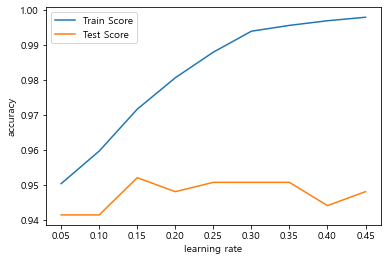

In [13]:
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend()

In [14]:
# LR 0.15

In [18]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경, 10 ~ 150
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)] 

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators=v_n_estimators, learning_rate= 0.15)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
gb_score_n = pd.DataFrame()
gb_score_n['n_estimators'] = para_n_tree
gb_score_n['TrainScore'] = train_score
gb_score_n['TestScore'] = test_score

gb_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.935,0.932
1,20,0.947,0.937
2,30,0.951,0.944
3,40,0.955,0.943
4,50,0.960,0.943
5,60,0.961,0.940
6,70,0.963,0.944
7,80,0.966,0.944
8,90,0.968,0.949
9,100,0.972,0.952


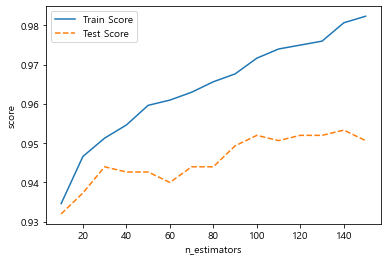

In [19]:
# 모델 설명력 그래프로 확인
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [20]:
# estimator = 100

In [21]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_depth = [depth for depth in range(1, 11)] # para_n_tree = [1, 2, 3, 4, ..., 10]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators = 100, learning_rate=0.15, max_depth= v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
gb_score_depth = pd.DataFrame()
gb_score_depth['Depth'] = para_depth
gb_score_depth['TrainScore'] = train_score
gb_score_depth['TestScore'] = test_score

gb_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.937,0.939
1,2,0.954,0.944
2,3,0.972,0.952
3,4,0.988,0.951
4,5,0.997,0.952
5,6,1.000,0.949
6,7,1.000,0.955
7,8,1.000,0.952
8,9,1.000,0.952
9,10,1.000,0.957


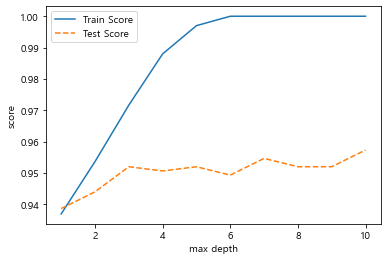

In [22]:
# 모델 설명력 그래프로 확인
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

In [ ]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_split = [n_split * 2 for n_split in range(2, 21)] # para_n_tree = [4, 6, 8, ..., 40]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators = 100, min_samples_split = v_min_samples_split, learning_rate=0.15, max_depth=4)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
gb_score_split = pd.DataFrame()
gb_score_split['MinSamplessplit'] = para_split
gb_score_split['TrainScore'] = train_score
gb_score_split['TestScore'] = test_score

gb_score_split.round(3)